# Airbnb rental project EDA and price and review analysis

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.io as pio

In [34]:
data=pd.read_csv("AirBnbdata10.csv")

In [35]:
data

,COUNTRY,Room Type,Duration,Rate,Hosted by,Rating,City,Night
0,Cambodia,Private room,10-15 Dec,1115,Theng,4.920,Kerong siem reap,5
1,Cambodia,Flat,23-28 Jan,1539,Phi,4.660,Chamkarmon,5
2,Cambodia,Hotel room,23-28 Jan,1377,Ranjit,4.560,kerong siem reap,5
3,Cambodia,Private room,25-1-29 Jan,4633,Vanavaree,4.920,Tanbon sanamchai,4
4,Cambodia,Private room,01-06 Feb,4859,Rob,4.880,koh kong,5
...,...,...,...,...,...,...,...,...
513,Sri Lanka,2BR,14-9 Feb,13053,Wei,4.910,Kandy,5
514,Sri Lanka,Villa,1-6 Mar,5601,Gaya,5.000,Kandy,5
515,Sri Lanka,2BR,1-8 Feb,9601,Jessica & Renato,4.890,Dickwella,7
516,Sri Lanka,TheGatehouse nine,1-8 Feb,6783,Mike,4.980,Galle,7


# # calculate the median  of the "Rate(Night)" column

In [36]:
median = data['Rate'].median()

# create a new column "Price Range" and assign the value "High" to all the rows where "Rate(Night)" is greater than or equal to the median
data.loc[data['Rate'] >= median, 'Price Range'] = 'High'

# assign the value "Medium" to all the rows where "Rate(Night)" is less than the median but greater than or equal to the median divided by 2
data.loc[(data['Rate'] < median) & (data['Rate'] >= median/2), 'Price Range'] = 'Medium'

# assign the value "Low" to all the rows where "Rate(Night)" is less than the median divided by 2
data.loc[data['Rate'] < median/2, 'Price Range'] = 'Low'

print(data['Price Range'].value_counts())


High      259
Medium    132
Low       127
Name: Price Range, dtype: int64


In [37]:
median = data['Night'].median()

# create a new column "Price Range" and assign the value "High" to all the rows where "Rate(Night)" is greater than or equal to the median
data.loc[data['Night'] >= median, 'Price Range'] = 'High'

# assign the value "Medium" to all the rows where "Rate(Night)" is less than the median but greater than or equal to the median divided by 2
data.loc[(data['Night'] < median) & (data['Rate'] >= median/2), 'Price Range'] = 'Medium'

# assign the value "Low" to all the rows where "Rate(Night)" is less than the median divided by 2
data.loc[data['Night'] < median/2, 'Price Range'] = 'Low'
print(data['Price Range'].value_counts())

High      428
Medium     76
Low        14
Name: Price Range, dtype: int64


In [38]:
room_type_counts = data['Room Type'].value_counts()
print(room_type_counts)

Apartment                    72
Villa                        63
Private room                 35
Home stay                    29
House                        14
                             ..
Dream adventure mongolia      1
 Guest house                  1
Terelj nomadic                1
Yurtin                        1
Lankahuts Residency           1
Name: Room Type, Length: 175, dtype: int64


In [39]:
data['Rate'].value_counts()
#value_counts = data["Rate"].value_counts()

#print(value_counts)




2855    7
1626    6
5711    6
6118    5
4895    5
       ..
1061    1
6363    1
4813    1
3392    1
6783    1
Name: Rate, Length: 420, dtype: int64

In [40]:
data['City'].value_counts()

Bali         12
singapore     7
Karachi       6
Kabul         6
Seoul         6
             ..
kuwait        1
Alahmady      1
Mahboula      1
Salmiya       1
Dehiwala      1
Name: City, Length: 358, dtype: int64

<AxesSubplot:>

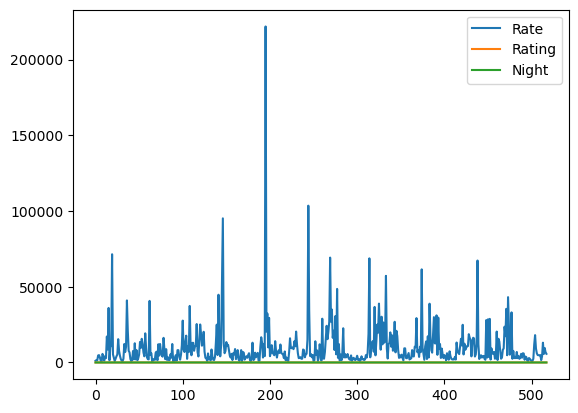

In [41]:
data.plot()

In [42]:
pd.set_option('display.max_columns', None)
data.head(200)

,COUNTRY,Room Type,Duration,Rate,Hosted by,Rating,City,Night,Price Range
0,Cambodia,Private room,10-15 Dec,1115,Theng,4.92,Kerong siem reap,5,High
1,Cambodia,Flat,23-28 Jan,1539,Phi,4.66,Chamkarmon,5,High
2,Cambodia,Hotel room,23-28 Jan,1377,Ranjit,4.56,kerong siem reap,5,High
3,Cambodia,Private room,25-1-29 Jan,4633,Vanavaree,4.92,Tanbon sanamchai,4,Medium
4,Cambodia,Private room,01-06 Feb,4859,Rob,4.88,koh kong,5,High
...,...,...,...,...,...,...,...,...,...
195,Qatar,Villa,20-06 April,221808,mohamed,5.00,Rayyan,6,High
196,Qatar,Apartment,14-19 Mar,20395,mirage,4.95,Doha,5,High
197,Qatar,Apartment,12-18 Oct,32305,belal,5.05,Daayen,6,High
198,Bahrain,Villa,10-16Jan,9954,ahemed,4.95,Karzakkan,6,High


In [43]:
data.columns

Index(['COUNTRY', 'Room Type', 'Duration', 'Rate', 'Hosted by', 'Rating',
       'City', 'Night', 'Price Range'],
      dtype='object')

In [44]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      COUNTRY  Room Type  Duration   Rate  Hosted by  Rating   City  Night  \
0      False      False     False  False      False   False  False  False   
1      False      False     False  False      False   False  False  False   
2      False      False     False  False      False   False  False  False   
3      False      False     False  False      False   False  False  False   
4      False      False     False  False      False   False  False  False   
..       ...        ...       ...    ...        ...     ...    ...    ...   
513    False      False     False  False      False   False  False  False   
514    False      False     False  False      False   False  False  False   
515    False      False     False  False      False   False  False  False   
516    False      False     False  False      False   False  False  False   
517    False      False     False  False      False   False  False  False   

     Price Ra

In [45]:
data.shape

(518, 9)

#  Create a function to group the rates into high, medium, and low

In [46]:
def group_rates(rate):
    if rate >= 5000:
        return "High"
    elif rate >= 1000 and rate < 5000:
        return "Medium"
    else:
        return "Low"


data["Rate Group"] = data["Rate"].apply(group_rates)
print(data.head())

    COUNTRY      Room Type     Duration  Rate  Hosted by  Rating  \
0  Cambodia  Private room     10-15 Dec  1115      Theng    4.92   
1  Cambodia          Flat     23-28 Jan  1539        Phi    4.66   
2  Cambodia    Hotel room     23-28 Jan  1377     Ranjit    4.56   
3  Cambodia  Private room   25-1-29 Jan  4633  Vanavaree    4.92   
4  Cambodia  Private room     01-06 Feb  4859        Rob    4.88   

                City  Night Price Range Rate Group  
0   Kerong siem reap      5        High     Medium  
1        Chamkarmon       5        High     Medium  
2   kerong siem reap      5        High     Medium  
3   Tanbon sanamchai      4      Medium     Medium  
4           koh kong      5        High     Medium  


In [47]:
data

,COUNTRY,Room Type,Duration,Rate,Hosted by,Rating,City,Night,Price Range,Rate Group
0,Cambodia,Private room,10-15 Dec,1115,Theng,4.920,Kerong siem reap,5,High,Medium
1,Cambodia,Flat,23-28 Jan,1539,Phi,4.660,Chamkarmon,5,High,Medium
2,Cambodia,Hotel room,23-28 Jan,1377,Ranjit,4.560,kerong siem reap,5,High,Medium
3,Cambodia,Private room,25-1-29 Jan,4633,Vanavaree,4.920,Tanbon sanamchai,4,Medium,Medium
4,Cambodia,Private room,01-06 Feb,4859,Rob,4.880,koh kong,5,High,Medium
...,...,...,...,...,...,...,...,...,...,...
513,Sri Lanka,2BR,14-9 Feb,13053,Wei,4.910,Kandy,5,High,High
514,Sri Lanka,Villa,1-6 Mar,5601,Gaya,5.000,Kandy,5,High,High
515,Sri Lanka,2BR,1-8 Feb,9601,Jessica & Renato,4.890,Dickwella,7,High,High
516,Sri Lanka,TheGatehouse nine,1-8 Feb,6783,Mike,4.980,Galle,7,High,High


# Data visualization

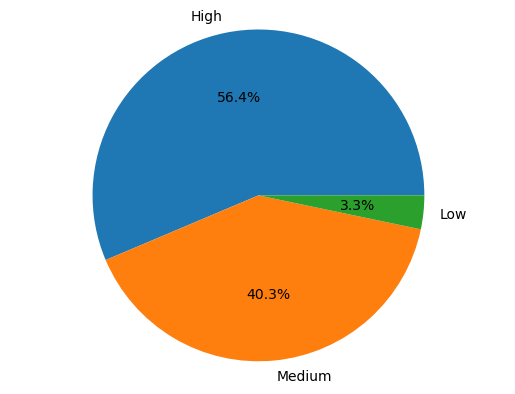

In [48]:
import matplotlib.pyplot as plt

# Count the number of each rate group
group_counts = data['Rate Group'].value_counts()

# Plot the pie chart
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()


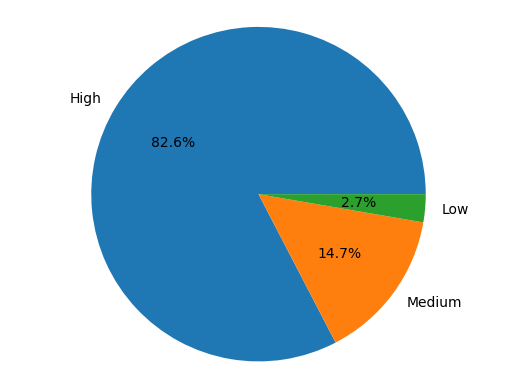

In [49]:
group_counts = data['Price Range'].value_counts()

# Plot the pie chart
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [50]:
import plotly.express as px
import plotly.graph_objs as go
labels = data["Price Range"].value_counts()[:].index
values = data["Price Range"].value_counts()[:].values

colors=data["Price Range"]

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

(array([0, 1, 2]),
 [Text(0, 0, 'High'), Text(1, 0, 'Medium'), Text(2, 0, 'Low')])

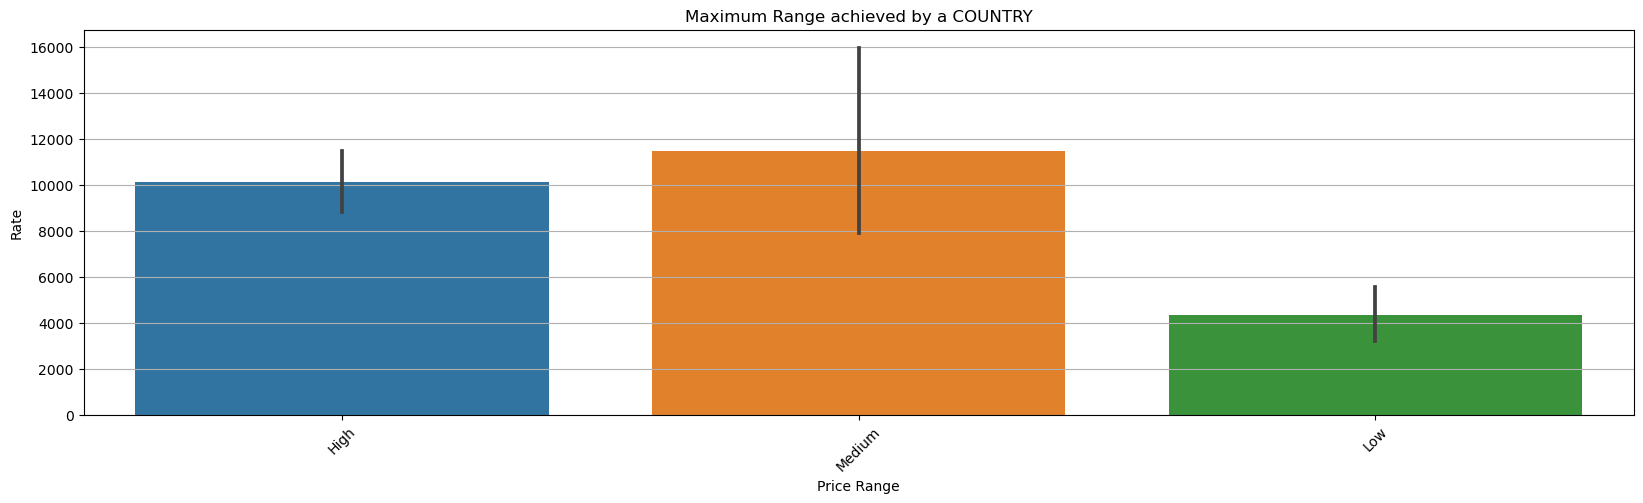

In [51]:
import seaborn as sns
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Price Range',y='Rate',data=data,palette='tab10')
plt.grid(axis='y')
plt.title('Maximum Range achieved by a COUNTRY')
plt.xlabel('Price Range')
plt.ylabel('Rate')
plt.xticks(rotation=45)

# converting string to Int


In [100]:
df2=data.select_dtypes("int64")
np.isinf(df2.stack()).groupby(level=1).sum()

Night     0
Rate      0
Rating    0
dtype: int64

In [101]:
df2

,Rate,Rating,Night
0,1115,4,5
1,1539,4,5
2,1377,4,5
3,4633,4,4
4,4859,4,5
...,...,...,...
513,13053,4,5
514,5601,5,5
515,9601,4,7
516,6783,4,7


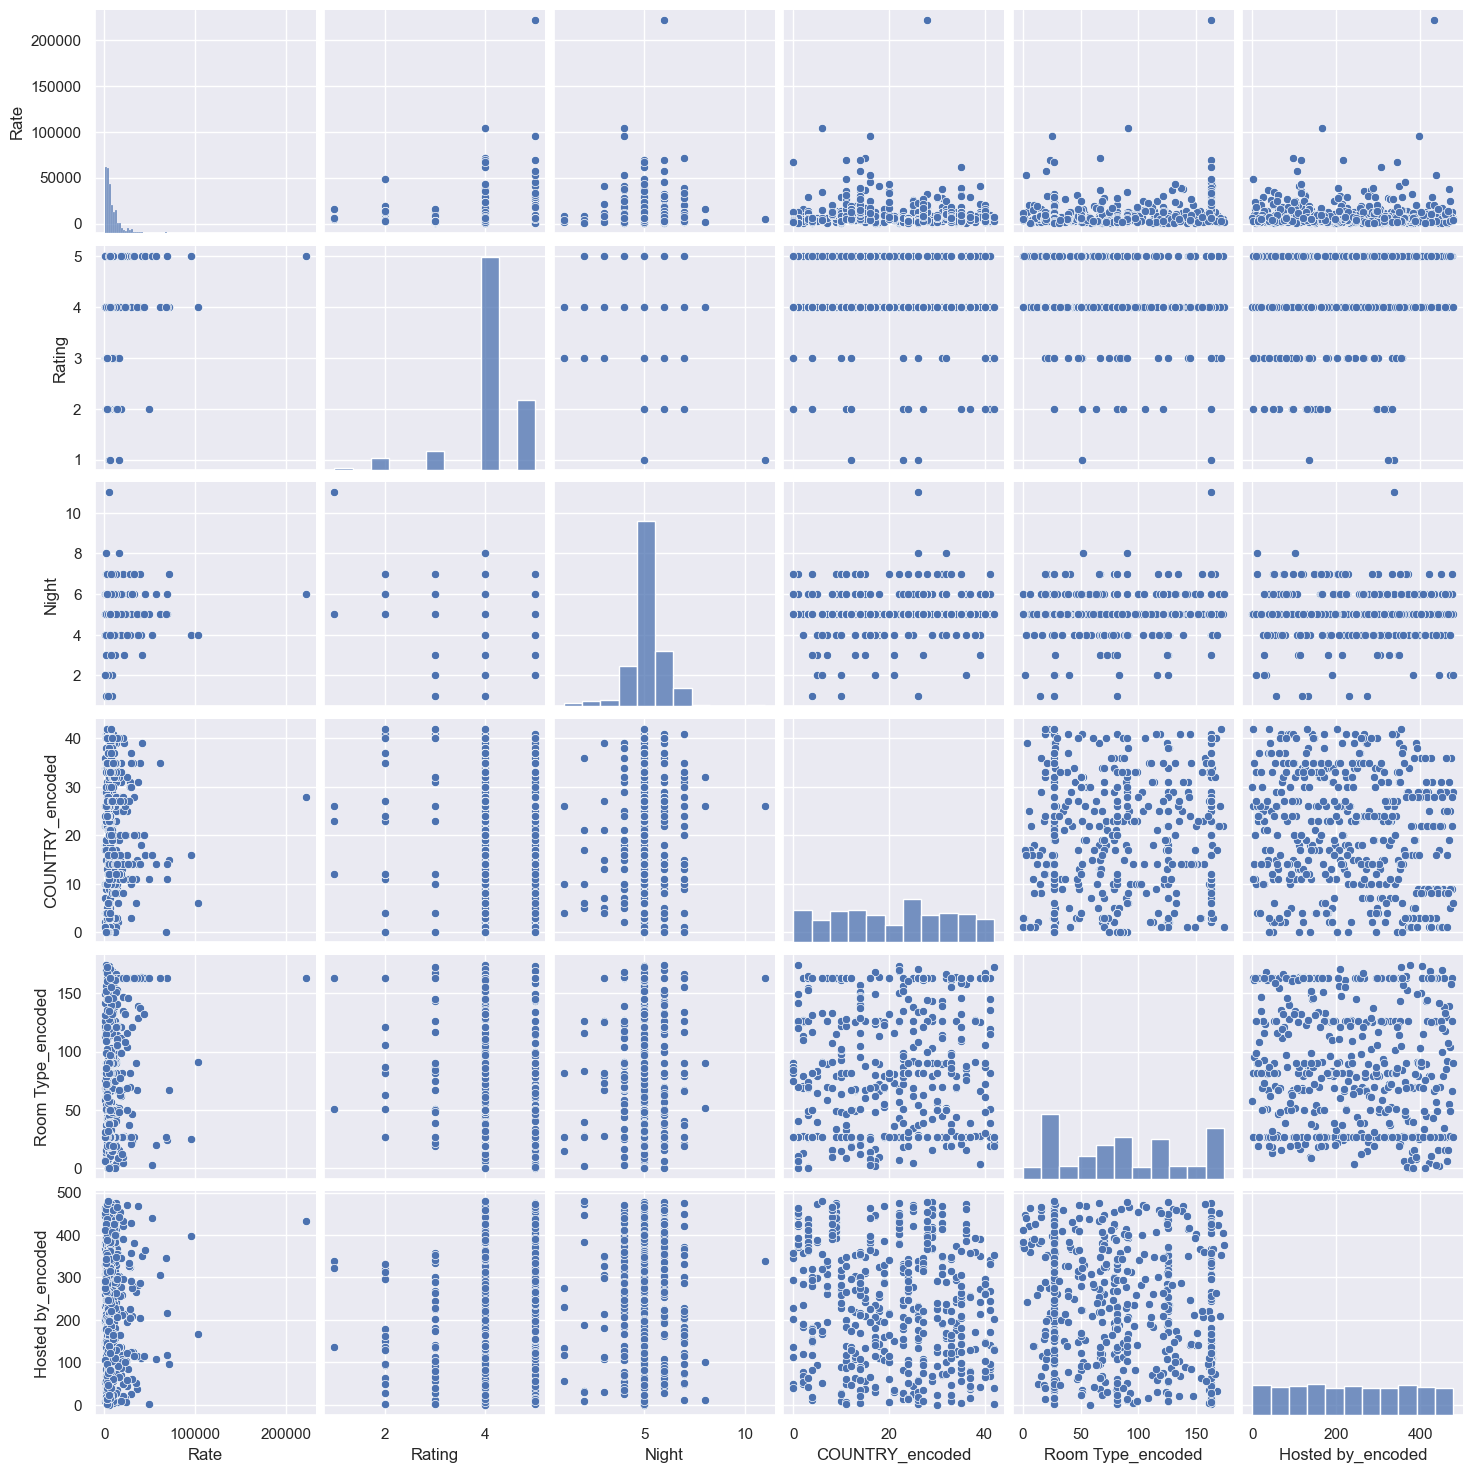

In [102]:
import seaborn as sns
sns.pairplot(data)

array([[<AxesSubplot:title={'center':'Rate'}>,
        <AxesSubplot:title={'center':'Rating'}>],
       [<AxesSubplot:title={'center':'Night'}>,
        <AxesSubplot:title={'center':'COUNTRY_encoded'}>],
       [<AxesSubplot:title={'center':'Room Type_encoded'}>,
        <AxesSubplot:title={'center':'Hosted by_encoded'}>]], dtype=object)

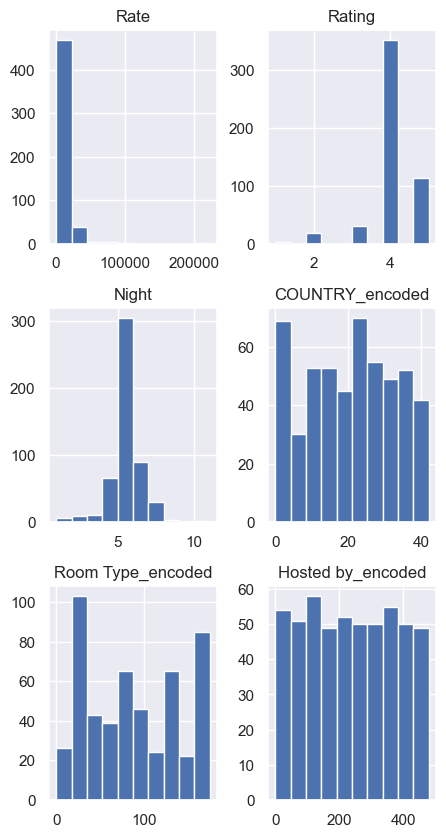

In [103]:
data.hist(figsize=(5,10))

<AxesSubplot:>

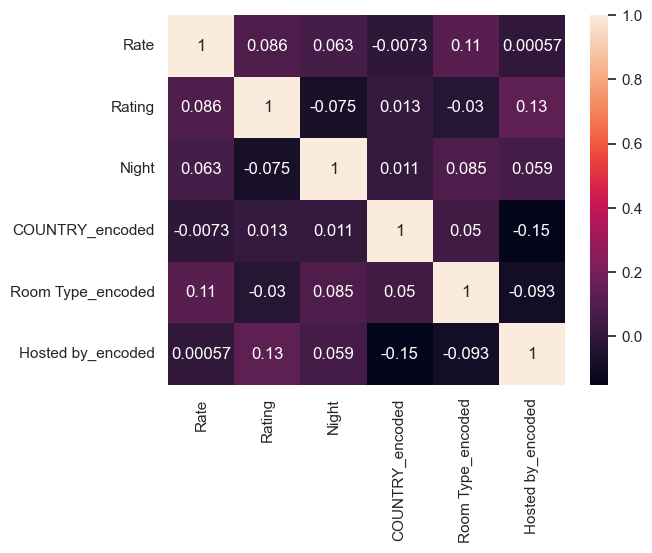

In [104]:
sns.heatmap(data.corr(),annot=True)

In [105]:
%pip install kaleido
import kaleido

Note: you may need to restart the kernel to use updated packages.


In [106]:
fig = px.pie(data,names = 'COUNTRY',values = 'Rating')
pio.show(fig)

In [107]:
Night = data.Night.value_counts(normalize=True).mul(100).round(1)
Night

5     58.9
6     17.4
4     12.7
7      5.8
3      1.9
2      1.7
1      1.0
8      0.4
11     0.2
Name: Night, dtype: float64

In [108]:
data.isnull().sum()

COUNTRY              0
Room Type            0
Duration             0
Rate                 0
Hosted by            0
Rating               0
City                 0
Night                0
Price Range          0
Rate Group           0
COUNTRY_encoded      0
Room Type_encoded    0
Hosted by_encoded    0
dtype: int64

In [109]:
COUNTRY= data.Night.value_counts()
COUNTRY

5     305
6      90
4      66
7      30
3      10
2       9
1       5
8       2
11      1
Name: Night, dtype: int64

In [110]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')

<Figure size 1280x720 with 0 Axes>

<Figure size 1280x720 with 0 Axes>

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, 'Afghanistan'),
  Text(1, 0, 'Armenia'),
  Text(2, 0, 'AzerbaiJan'),
  Text(3, 0, 'Bahrain '),
  Text(4, 0, 'Bangladesh'),
  Text(5, 0, 'Bhutan'),
  Text(6, 0, 'Brunei'),
  Text(7, 0, 'Cambodia'),
  Text(8, 0, 'Cyprus'),
  Text(9, 0, 'Geargia'),
  Text(10, 0, 'India'),
  Text(11, 0, 'Indonesia'),
  Text(12, 0, 'Iraq'),
  Text(13, 0, 'Israel '),
  Text(14, 0, 'Japan'),
  Text(15, 0, 'Jardon'),
  Text(16, 0, 'Kuwait'),
  Text(17, 0, 'Kyrgyzstan'),
  Text(18, 0, 'Laos'),
  Text(19, 0, 'Lebanon'),
  Text(20, 0, 'Malaysia'),
  Text(21, 0, 'Maldives'),
  Text(22, 0, 'Mongolia'),
  Text(23, 0, 'Myanmar'),
  Text(24, 0, 'Nepal'),
  Text(25, 0, 'Oman'),
  Text(26, 0, 'Pakistan'),
  Text(27, 0, 'Philippines'),
  Text(28, 0, 'Qatar'),
  Text(29, 0, 'Sate of Palestine'),
  Text(30, 0, 'Saud

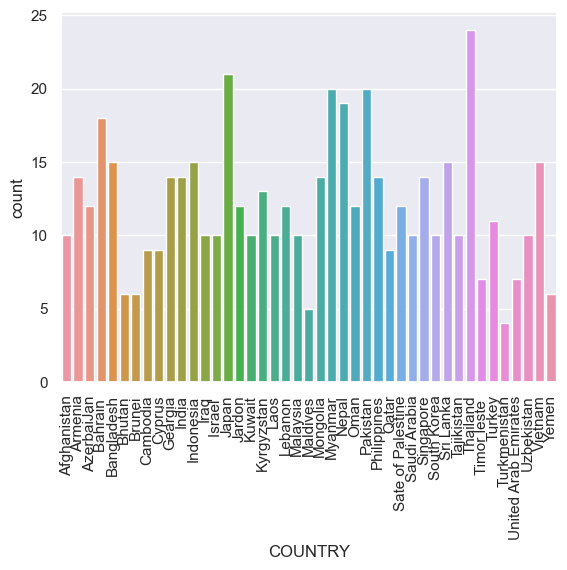

In [111]:
sns.countplot("COUNTRY",data=data)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Night', ylabel='count'>

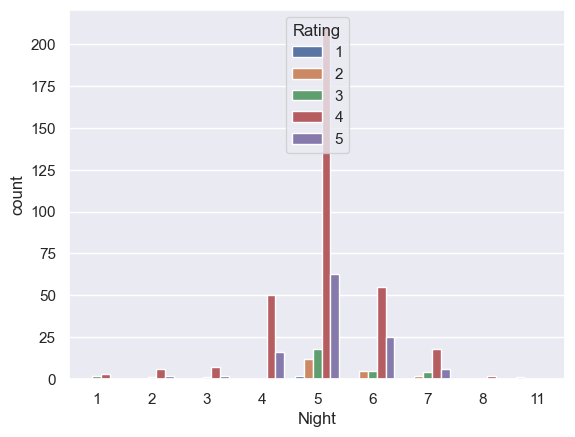

In [112]:
sns.countplot(data=data,x="Night",hue="Rating")
#plt.xticks(rotation=45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '11')])

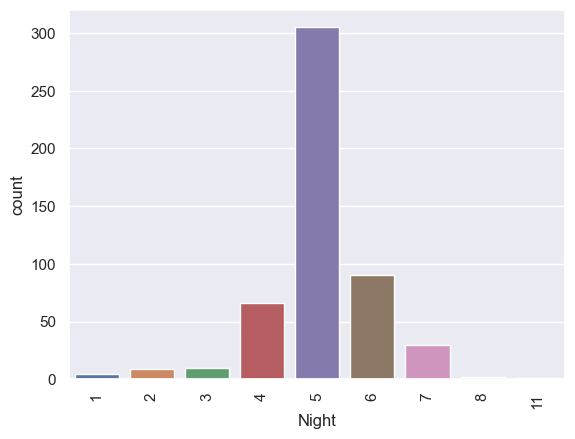

In [113]:
sns.countplot("Night",data=data)
plt.xticks(rotation=90)

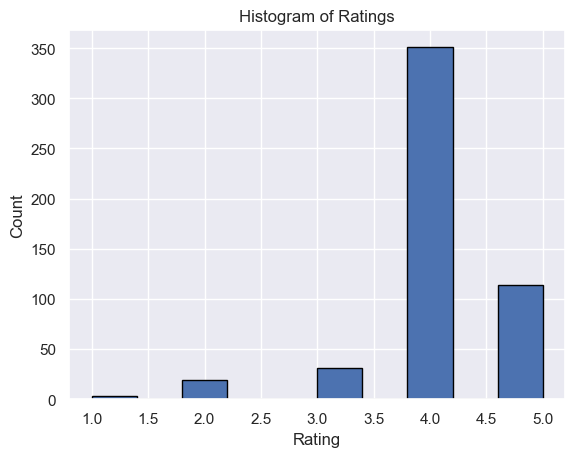

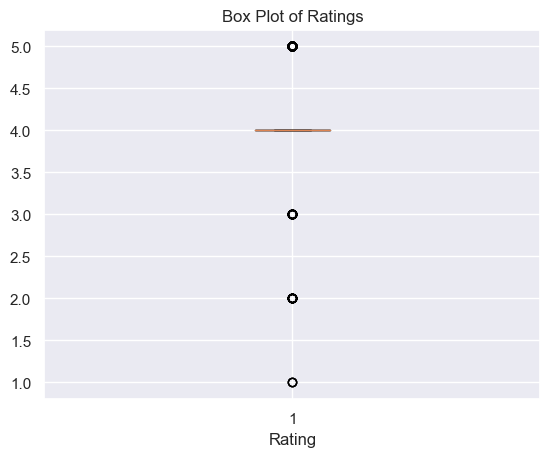

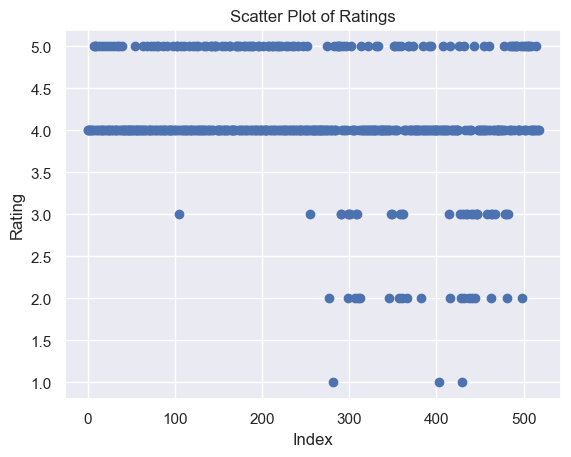

In [114]:
#Histogram and boxplot
# create a histogram of the rating values
plt.hist(data['Rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram of Ratings')
plt.show()

# create a box plot of the rating values
plt.boxplot(data['Rating'])
plt.xlabel('Rating')
plt.title('Box Plot of Ratings')
plt.show()

# create a scatter plot of the rating values
plt.scatter(data.index, data['Rating'])
plt.xlabel('Index')
plt.ylabel('Rating')
plt.title('Scatter Plot of Ratings')
plt.show()


In [115]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [116]:
data['City'] = data['City'].replace(0,'null')
City = pd.DataFrame({'city':data['City'].unique()})
labelled = le.fit_transform(City ['city'])
City['labelled'] = labelled
City 

,city,labelled
0,Kerong siem reap,142
1,Chamkarmon,1
2,kerong siem reap,320
3,Tanbon sanamchai,4
4,koh kong,325
...,...,...
353,Beliatta,39
354,Kandy,134
355,Dickwella,71
356,Galle,87


In [117]:
data['Night'] = data['Night'].astype(int)
data['Rating'] = data['Rating'].astype(int)

In [118]:
# calculate the median of the "Rate(Night)" column
median = data['Rate'].median()

# create a new column "Price Range" and assign the value "High" to all the rows where "Rate(Night)" is greater than or equal to the median
data.loc[data['Rate'] >= median, 'Price Range'] = 'High'

# assign the value "Medium" to all the rows where "Rate(Night)" is less than the median but greater than or equal to the median divided by 2
data.loc[(data['Rate'] < median) & (data['Rate'] >= median/2), 'Price Range'] = 'Medium'

# assign the value "Low" to all the rows where "Rate(Night)" is less than the median divided by 2
data.loc[data['Rate'] < median/2, 'Price Range'] = 'Low'

# display the class distribution of the "Price Range" column
print(data['Price Range'].value_counts())

High      259
Medium    132
Low       127
Name: Price Range, dtype: int64


In [119]:
# convert categorical variables into numerical values
data['COUNTRY'] = data['COUNTRY'].astype('category')
data['Room Type'] = data['Room Type'].astype('category')
data['Hosted by'] = data['Hosted by'].astype('category')

# assign a unique number to each category
data['COUNTRY_encoded'] = data['COUNTRY'].cat.codes
data['Room Type_encoded'] = data['Room Type'].cat.codes
data['Hosted by_encoded'] = data['Hosted by'].cat.codes

# print the encoded dataframe
print(data)

       COUNTRY             Room Type     Duration   Rate         Hosted by  \
0     Cambodia         Private room     10-15 Dec   1115             Theng   
1     Cambodia                 Flat     23-28 Jan   1539               Phi   
2     Cambodia           Hotel room     23-28 Jan   1377            Ranjit   
3     Cambodia         Private room   25-1-29 Jan   4633         Vanavaree   
4     Cambodia         Private room     01-06 Feb   4859               Rob   
..         ...                   ...          ...    ...               ...   
513  Sri Lanka                   2BR     14-9 Feb  13053               Wei   
514  Sri Lanka                 Villa      1-6 Mar   5601              Gaya   
515  Sri Lanka                   2BR      1-8 Feb   9601  Jessica & Renato   
516  Sri Lanka     TheGatehouse nine      1-8 Feb   6783              Mike   
517  Sri Lanka  Lankahuts Residency     11-16 Feb   5711            Chandi   

     Rating               City  Night Price Range Rate Group  C

In [120]:
# Calculate mean
mean = data["Rate"].mean()
print("Mean:", mean)

# Calculate median
median = data["Rate"].median()
print("Median:", median)

# Calculate mode
mode = data["Rate"].mode().values[0]
print("Mode:", mode)

# Calculate standard deviation
std = data["Rate"].std()
print("Standard Deviation:", std)

Mean: 10142.355212355213
Median: 6029.0
Mode: 2855
Standard Deviation: 15101.070660073863


In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the data into a pandas DataFrame


# Split the data into a training and test set
train_data, test_data= train_test_split(data, test_size=0.2, random_state=42)

# Select the features to be used in the model
X_train = train_data[[ 'Rating', 'Night']]
y_train = train_data['Rate']

X_test = test_data[['Rating', 'Night']]
y_test = test_data['Rate']

# Train the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test data
score = model.score(X_test, y_test)
print('Test score:', score)

Test score: 0.0048281258558705575


In [122]:
data=data.replace(np.nan,0)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   COUNTRY            518 non-null    category
 1   Room Type          518 non-null    category
 2   Duration           518 non-null    object  
 3   Rate               518 non-null    int64   
 4   Hosted by          518 non-null    category
 5   Rating             518 non-null    int64   
 6   City               518 non-null    object  
 7   Night              518 non-null    int64   
 8   Price Range        518 non-null    object  
 9   Rate Group         518 non-null    object  
 10  COUNTRY_encoded    518 non-null    int8    
 11  Room Type_encoded  518 non-null    int16   
 12  Hosted by_encoded  518 non-null    int16   
dtypes: category(3), int16(2), int64(3), int8(1), object(4)
memory usage: 60.2+ KB


In [124]:
mean_price = data.groupby('City').agg({'Rate':'mean'})
mean_price

,Rate
City,
Battambang,2429.666667
Chamkarmon,1539.000000
Goris,1153.000000
Imereti,5711.000000
Tanbon sanamchai,4633.000000
...,...
tsavazard,6445.000000
turkmenabat,3659.000000
vang vang,2033.000000


In [125]:
data['Room Type'].describe()

count           518
unique          175
top       Apartment
freq             72
Name: Room Type, dtype: object

In [126]:
data['Rating'] = pd.to_datetime(data['Rating'])
data['Rating'] = pd.to_numeric(data['Rating'])
data['Rate'].corr(data['Rating'])

0.08554010180955811

# Train model

In [127]:
x=df2.drop(columns="Rate",axis=1)
y=df2["Rate"]

In [128]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [129]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


array([12022.59748824, 12022.59748824, 10612.95798985,  9900.7199918 ,
       12022.59748824,  9188.48199376,  9900.7199918 , 10612.95798985,
        7793.67899308,  9900.7199918 , 10612.95798985,  9900.7199918 ,
        9900.7199918 ,  7793.67899308,  9900.7199918 ,  9188.48199376,
        9900.7199918 ,  9900.7199918 , 11310.35949019, 11310.35949019,
        8476.24399571,  9900.7199918 , 10612.95798985,  9900.7199918 ,
       11310.35949019,  9900.7199918 ,  9188.48199376,  9900.7199918 ,
        8491.08049342,  9188.48199376,  9188.48199376, 12022.59748824,
        7051.76799961,  9900.7199918 ,  9900.7199918 , 11310.35949019,
        8491.08049342,  9900.7199918 ,  8476.24399571,  9900.7199918 ,
        9900.7199918 ,  7764.00599766,  9900.7199918 ,  9900.7199918 ,
        7793.67899308, 10612.95798985,  9900.7199918 , 11310.35949019,
        9900.7199918 , 11310.35949019,  9900.7199918 ,  8491.08049342,
        9900.7199918 ,  9900.7199918 ,  9900.7199918 ,  9900.7199918 ,
      

In [130]:
predictions = pd.DataFrame({"original_Price": y_test.values, "predicted_Price": y_pred})
predictions.head(10)

,original_Price,predicted_Price
0,17076,12022.597488
1,6909,12022.597488
2,14065,10612.957990
3,2900,9900.719992
4,3263,12022.597488
5,36003,9188.481994
6,2477,9900.719992
7,10647,10612.957990
8,3236,7793.678993
9,1845,9900.719992


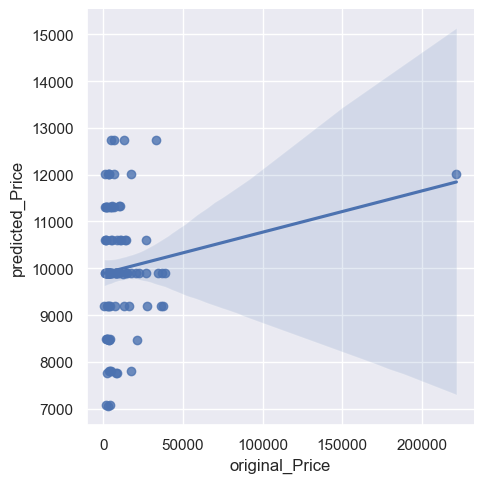

In [131]:
sns.lmplot(x="original_Price",y="predicted_Price",data=predictions)

In [132]:
model.score(x_test,y_test)

0.013946129575375554

In [133]:
error=y_pred-y_test
error

142    -5053.402512
107     5113.597488
206    -3452.042010
261     7000.719992
172     8759.597488
           ...     
236     5317.005998
346    -9694.321007
49      6342.481994
100   -18446.518006
154     8314.835486
Name: Rate, Length: 104, dtype: float64

In [134]:
from sklearn import metrics
model.intercept_

700.9720080135048

# Random forest regressor model

In [135]:
from sklearn.ensemble import RandomForestRegressor
Model=RandomForestRegressor(n_estimators=200)
Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)

In [136]:
y_pred

array([17198.53943564, 17198.53943564,  9306.03775423,  9583.83386456,
       17198.53943564, 10282.07528628,  9583.83386456,  9306.03775423,
       10642.62391067,  9583.83386456,  9306.03775423,  9583.83386456,
        9583.83386456, 10642.62391067,  9583.83386456, 10282.07528628,
        9583.83386456,  9583.83386456,  8956.70761845,  8956.70761845,
        6097.40639899,  9583.83386456,  9306.03775423,  9583.83386456,
        8956.70761845,  9583.83386456, 10282.07528628,  9583.83386456,
        6704.50993908, 10282.07528628, 10282.07528628, 17198.53943564,
        5746.54383333,  9583.83386456,  9583.83386456,  8956.70761845,
        6704.50993908,  9583.83386456,  6097.40639899,  9583.83386456,
        9583.83386456,  4680.68166667,  9583.83386456,  9583.83386456,
       10642.62391067,  9306.03775423,  9583.83386456,  8956.70761845,
        9583.83386456,  8956.70761845,  9583.83386456,  6704.50993908,
        9583.83386456,  9583.83386456,  9583.83386456,  9583.83386456,
      

In [137]:
predictions = pd.DataFrame({"original_Price": y_test.values, "predicted_Price": y_pred})
predictions.head(10)

,original_Price,predicted_Price
0,17076,17198.539436
1,6909,17198.539436
2,14065,9306.037754
3,2900,9583.833865
4,3263,17198.539436
5,36003,10282.075286
6,2477,9583.833865
7,10647,9306.037754
8,3236,10642.623911
9,1845,9583.833865


<AxesSubplot:xlabel='original_Price', ylabel='predicted_Price'>

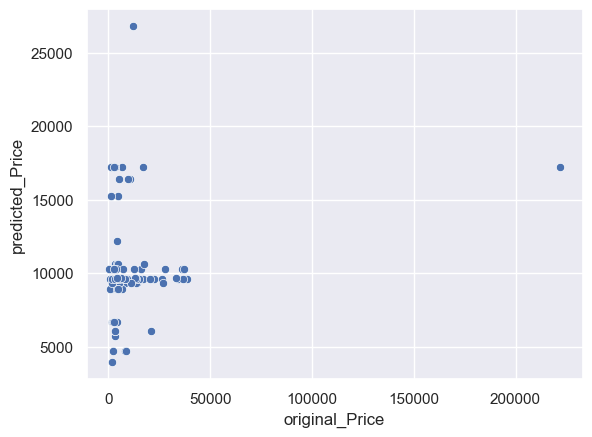

In [138]:
sns.scatterplot(x="original_Price",y="predicted_Price",data=predictions)

In [139]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# load the data

# split the data into features and target class
X = predictions.drop("original_Price", axis=1) # features
y = predictions["predicted_Price"] # target class

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# create the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# train the model
model.fit(X_train, y_train)

# evaluate the model
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))


Train accuracy: 0.9916376853447956
Test accuracy: 0.9999086837789317


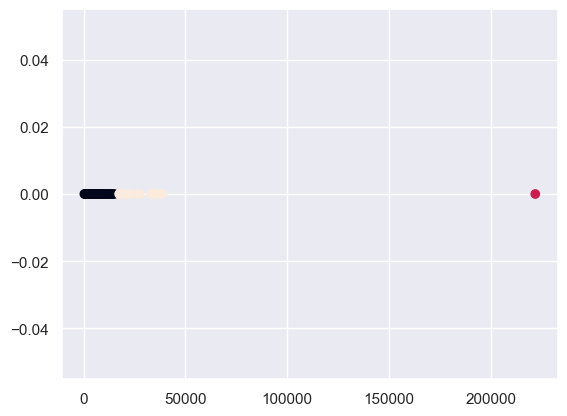

In [140]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame


# Prepare the feature matrix (X) by extracting the "Rate" column from the DataFrame
X = predictions[["original_Price"]].values

# Fit the KMeans model to the data
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Predict the cluster assignments for each sample in the feature matrix
labels = kmeans.predict(X)

# Plot the clustering results
plt.scatter(X[:, 0], np.zeros(X.shape[0]), c=labels)
plt.show()


In [141]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# load the dataset


# separate the target class and features
X = df2.drop("Rate", axis=1)
y = df2["Rating"]

# split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# make predictions on the test set
y_pred = knn.predict(X_test)

# evaluate the model performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the KNN model:", acc)


Accuracy of the KNN model: 0.9519230769230769


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



# Split the data into training and test sets
X = df2.drop("Rate", axis=1)
y = df2["Rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 1.0
